While exploring the Aerial Bombing Operations of World War Two dataset (https://www.kaggle.com/usaf/world-war-ii), and recalling that the D-Day landings were nearly postponed due to poor weather, I sought out weather reports from the period to compare with missions in the bombing operations dataset.

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

The data are taken from the United States National Oceanic and Atmospheric Administration (https://www.kaggle.com/noaa) National Centres for Environmental Information website: https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df1 = pd.read_csv("dataset\summary-of-weather.csv")
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [5]:
# cleanup the columns having >70% null values
df1.drop(columns=['STA', 'WindGustSpd', 'PoorWeather',  'DR', 'SPD', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],inplace=True)
df1.head()
# drop temp. columns in Fahrenheit
df1.drop(columns=['MIN', 'MAX', 'MEA', 'Precip'], inplace=True)

# removing the columns having >70% null through code 
# null_percentages = df1.isnull().sum() / df1.shape[0]
# null_percentages *= 100
# null_df = pd.DataFrame({'Null Percentage (%)':null_percentages})
# null_df.sort_values(by='Null Percentage (%)')
# dropped_cols = [col for col in null_df1.index if null_df1.loc[col][0] > 70]
# df1.drop(columns=dropped_cols, inplace=True)

In [6]:
# snowfall, snf and prcp are considered object; we'll convert them to float
df1['Snowfall']=pd.to_numeric(df1['Snowfall'],errors='coerce')
df1['PRCP']=pd.to_numeric(df1['PRCP'],errors='coerce')
df1['SNF']=pd.to_numeric(df1['SNF'],errors='coerce')

In [7]:
# converting date to our standard format
df1['Date']=pd.to_datetime(df1['Date'])
df1['Date'].head()

0   1942-07-01
1   1942-07-02
2   1942-07-03
3   1942-07-04
4   1942-07-05
Name: Date, dtype: datetime64[ns]

In [8]:
df1.dtypes

Date        datetime64[ns]
MaxTemp            float64
MinTemp            float64
MeanTemp           float64
Snowfall           float64
YR                   int64
MO                   int64
DA                   int64
PRCP               float64
SNF                float64
dtype: object

In [9]:
df1.isnull().sum()

Date            0
MaxTemp         0
MinTemp         0
MeanTemp        0
Snowfall     1207
YR              0
MO              0
DA              0
PRCP        18685
SNF          1207
dtype: int64

In [10]:
df1['Snowfall'] = df1['Snowfall'].fillna(df1['Snowfall'].mean())
df1['PRCP'] = df1['PRCP'].fillna(df1['PRCP'].mean())
df1['SNF'] = df1['SNF'].fillna(df1['SNF'].mean())

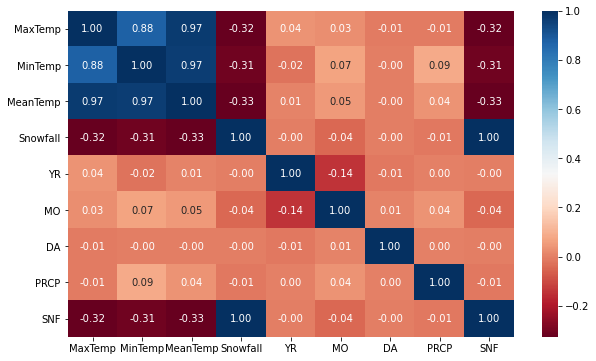

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df1.corr(), cmap='RdBu', annot=True, fmt=".2f");

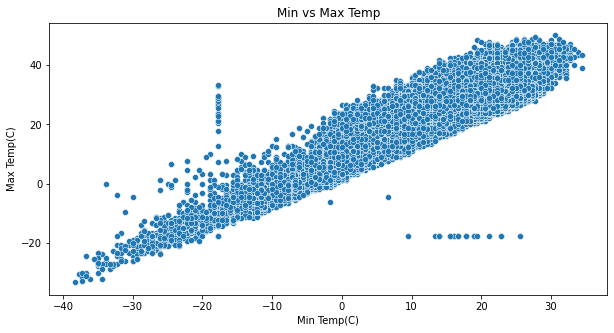

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df1, x='MinTemp', y='MaxTemp').set(title='Min vs Max Temp', xlabel='Min Temp(C)', ylabel='Max Temp(C)');

In [14]:
# removing the visible outliers in scatterplot
df1.drop(df1[(df1['MinTemp'] < -15) & (df1['MaxTemp'] > 15)].index, inplace = True)
df1.drop(df1[(df1['MinTemp'] > 8) & (df1['MaxTemp'] < -15)].index, inplace = True)

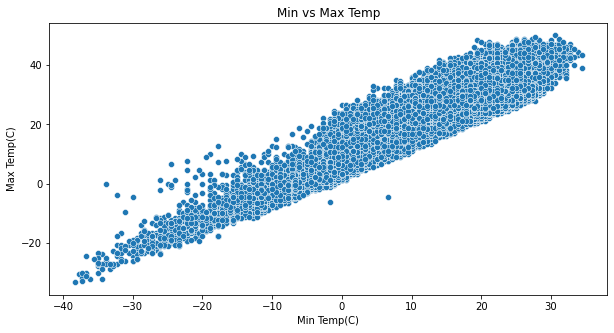

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df1, x='MinTemp', y='MaxTemp').set(title='Min vs Max Temp', xlabel='Min Temp(C)', ylabel='Max Temp(C)');

In [16]:
df2 = pd.read_csv("dataset\weather-station-locations.csv")
df2.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


WBAN: Weather station number <br/>
NAME: weather station name <br/>
STATE/COUNTRY ID: acronym of countries<br/>
Latitude: Latitude of weather station<br/>
Longitude: Longitude of weather station

In [17]:
df2.describe()

,WBAN,ELEV,Latitude,Longitude
count,161.000000,161.000000,161.000000,161.000000
mean,33421.440994,439.850932,20.347205,8.364182
std,20826.534394,1745.422339,21.042992,87.420419
min,10001.000000,1.000000,-27.600000,-175.000000
25%,13601.000000,9.000000,8.233333,-60.850000
50%,32906.000000,27.000000,22.333333,9.083333
75%,34150.000000,98.000000,36.116667,67.250000
max,82506.000000,9999.000000,67.016667,177.366667


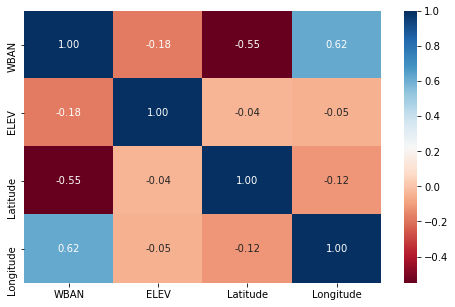

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df2.corr(), cmap='RdBu', annot=True, fmt=".2f");

In [19]:
from sklearn.model_selection import train_test_split
y = df1['MaxTemp']
X = df1.drop(['MaxTemp', 'Date'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=101)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_X)
train_X=scaler.transform(train_X)
test_X=scaler.transform(test_X)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [22]:
preds = model.predict(test_X)

In [24]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
print(mean_absolute_error(test_y,preds).round(5))
print(mean_squared_error(test_y,preds).round(5))
print(np.sqrt(mean_squared_error(test_y,preds)).round(5))

0.32774
0.24445
0.49442


### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>